<a href="https://colab.research.google.com/github/alptekinynk/Advance-Deep-Learning/blob/main/ADL_Exercise4(Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [10]:
# MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# CNN -> expanding (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)  # (28, 28) -> (28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1), x_test shape: (10000, 28, 28, 1)


In [11]:
# Batch Normalization CNN
def create_cnn_with_batch_norm(input_shape=(28, 28, 1), activation_function='relu'):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=input_shape),
        layers.BatchNormalization(),  # Batch Normalization
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.BatchNormalization(),  # Batch Normalization
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.BatchNormalization(),  # Batch Normalization
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.BatchNormalization(),  # Batch Normalization
        layers.Dense(10, activation='softmax')  # Çıkış katmanı
    ])
    return model

In [12]:
# Without Batch Normalization CNN
def create_cnn_without_batch_norm(input_shape=(28, 28, 1), activation_function='relu'):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dense(10, activation='softmax')  # Çıkış katmanı
    ])
    return model

In [13]:
# Train and validation
def train_and_evaluate(model, optimizer, x_train, y_train, x_test, y_test, epochs=10):
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs,
                        validation_data=(x_test, y_test), verbose=1)
    return history

In [14]:
# calculate loss and plot
def plot_classification_error(history, title):
    train_error = [100 * (1 - acc) for acc in history.history['accuracy']]
    val_error = [100 * (1 - acc) for acc in history.history['val_accuracy']]

    plt.figure(figsize=(8, 6))
    plt.plot(train_error, label='Training Error (%)')
    plt.plot(val_error, label='Validation Error (%)')
    plt.title(f'{title} - Classification Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (%)')
    plt.legend()
    plt.show()


Training with Batch Normalization
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9332 - loss: 0.2282 - val_accuracy: 0.9873 - val_loss: 0.0386
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0449 - val_accuracy: 0.9887 - val_loss: 0.0376
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9904 - loss: 0.0323 - val_accuracy: 0.9901 - val_loss: 0.0329
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9921 - loss: 0.0246 - val_accuracy: 0.9903 - val_loss: 0.0319
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9911 - val_loss: 0.0315
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9912 - val_loss: 0.0295
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9958 - loss: 0.0126 - val_accuracy: 0.9918 - val_loss: 0.0267
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/s

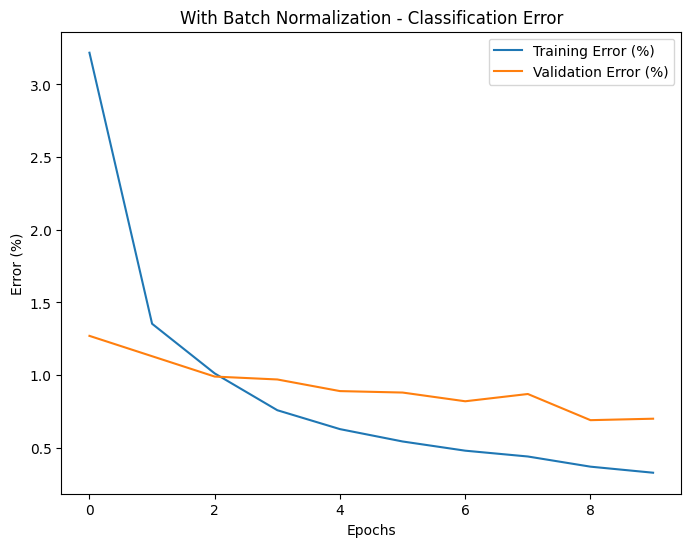

In [16]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Optima
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Batch Normalization
print("\nTraining with Batch Normalization")
model_with_bn = create_cnn_with_batch_norm()
history_with_bn = train_and_evaluate(model_with_bn, optimizer, x_train, y_train, x_test, y_test, epochs=10)

# Plot result
plot_classification_error(history_with_bn, title="With Batch Normalization")


Training without Batch Normalization
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8946 - loss: 0.3328 - val_accuracy: 0.9840 - val_loss: 0.0544
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9847 - loss: 0.0486 - val_accuracy: 0.9903 - val_loss: 0.0322
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9888 - loss: 0.0350 - val_accuracy: 0.9891 - val_loss: 0.0356
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accuracy: 0.9903 - val_loss: 0.0317
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accuracy: 0.9881 - val_loss: 0.0417
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9919 - val_loss: 0.0270
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9918 - val_loss: 0.0285
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/ste

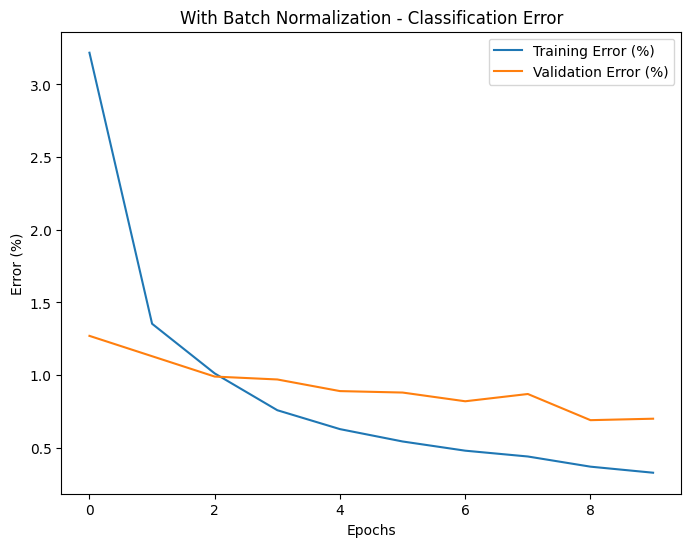

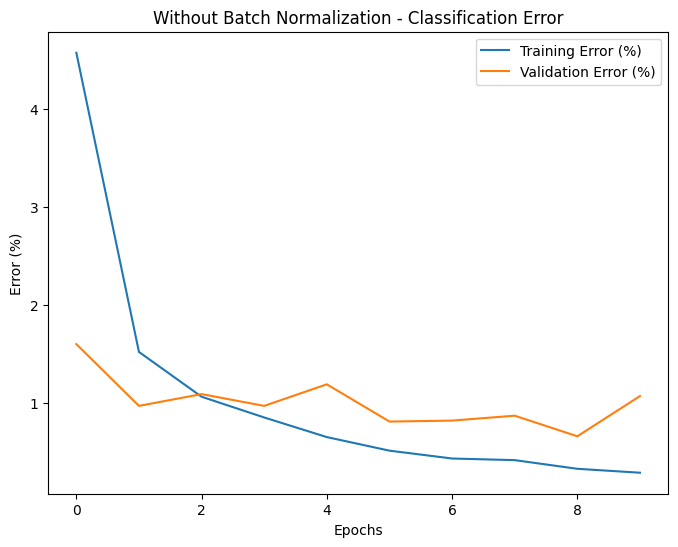

In [17]:
print("\nTraining without Batch Normalization")
model_without_bn = create_cnn_without_batch_norm()

# new optima
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# train model
history_without_bn = train_and_evaluate(model_without_bn, optimizer, x_train, y_train, x_test, y_test, epochs=10)

# plot result
plot_classification_error(history_with_bn, title="With Batch Normalization")
plot_classification_error(history_without_bn, title="Without Batch Normalization")